In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import cv2
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
# Using two channel similarity measures

def normalized_cut1(W, num_clusters):
    n = W.shape[0]
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = np.sum(W[i, :])
    L = D - W
    inverse_sqrt_D = np.linalg.inv(np.sqrt(D))
    L = inverse_sqrt_D@L@inverse_sqrt_D
    eigenvalues, eigenvectors = la.eigh(L)
    idx = np.argsort(eigenvalues)[:num_clusters]
    eigenvectors = eigenvectors[:, idx]
    labels = np.zeros(n, dtype=int)
    for i in range(num_clusters):
        labels[eigenvectors[:, i] >= 0] = i
    return labels

def image_segmentation1(image, num_clusters,background_color,object_color):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    width = min(70,int(image.shape[1] * 0.5))
    height = min(70,int(image.shape[0] * 0.5))
    dim = (width, height)
    gray = cv2.resize(gray,dim, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    
    # Reshape the image into a 2D array of pixels
    pixels = gray.reshape(-1)
    n = len(pixels)
    # Compute the similarity matrix
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = (pixels[i] - pixels[j])**2
            W[i, j] = np.exp(-d/50)
            W[j, i] = W[i, j]
    # Perform image segmentation using the N-Cut algorithm
    labels = normalized_cut1(W, num_clusters)
    # Create a new image with the segmented regions colored differently
    segments = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
    for i in range(num_clusters):
        idx = (labels == i)
        if(i==0):
          segments[idx.reshape(gray.shape[0], gray.shape[1])] = object_color
        else:
          segments[idx.reshape(gray.shape[0], gray.shape[1])] = background_color
    return segments

In [3]:
import cv2
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
# Using three channels similarity measure

def normalized_cut2(W, num_clusters):
    n = W.shape[0]
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = np.sum(W[i, :])  
    L = D - W
    inverse_sqrt_D = np.linalg.inv(np.sqrt(D))
    L = inverse_sqrt_D@L@inverse_sqrt_D
    eigenvalues, eigenvectors = la.eigh(L)
    idx = np.argsort(eigenvalues)[:2]
    
    eigenvectors = eigenvectors[:, idx]
    labels = np.zeros(n, dtype=int)
    for i in range(num_clusters):
        labels[eigenvectors[:, i] >= 0] = i
    return labels

def image_segmentation2(image, num_clusters,background_color,object_color):
    
    width = min(70,int(image.shape[1] * 0.5))
    height = min(70,int(image.shape[0] * 0.5))
    dim = (width, height)
    image = cv2.resize(image,dim, fx=1, fy=1, interpolation=cv2.INTER_LINEAR)
    
    # Reshape the image into a 2D array of pixels
    pixels = image.reshape((-1,3))
    n = len(pixels)
    # Compute the similarity matrix
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = (pixels[i][0] - pixels[j][0])**2 + (pixels[i][2] - pixels[j][2])**2 + (pixels[i][1] - pixels[j][1])**2
            W[i, j] = np.exp(-d/50)
            W[j, i] = W[i, j]
    # Perform image segmentation using the N-Cut algorithm
    labels = normalized_cut2(W, num_clusters)
    # Create a new image with the segmented regions colored differently
    segments = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    # for i in range(num_clusters):
    #     idx = (labels == i)
    #     segments[idx.reshape(image.shape[0], image.shape[1])] = np.random.randint(0, 256, size=3)
    for i in range(num_clusters):
        idx = (labels == i)
        if(i==0):
          segments[idx.reshape(image.shape[0], image.shape[1])] = object_color
        else:
          segments[idx.reshape(image.shape[0], image.shape[1])] = background_color
    return segments

<ipython-input-25-0ed69ea45fe6>:38: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (pixels[i] - pixels[j])**2


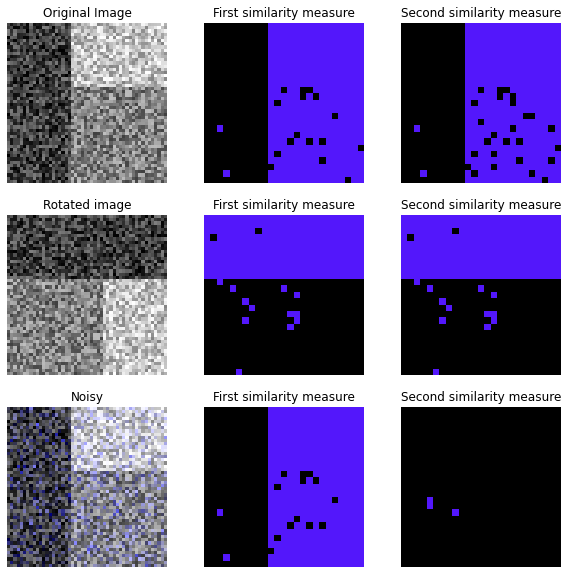

In [ ]:
# Original Image
image1 = cv2.imread("/content/drive/MyDrive/AIP_A2/test1.png")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Display the original image
axs[0, 0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display the segmented image using similarity measure-1
segmented1_image1 = image_segmentation1(image1, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 1].imshow(cv2.cvtColor(segmented1_image1, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("First similarity measure")
axs[0, 1].axis('off')

# Display the segmented image using similarity measure-2
segmented2_image1 = image_segmentation2(image1, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 2].imshow(cv2.cvtColor(segmented2_image1, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Second similarity measure")
axs[0, 2].axis('off')

# Rotate the image
rotated_image1 = cv2.rotate(image1, cv2.ROTATE_90_CLOCKWISE)
axs[1, 0].imshow(cv2.cvtColor(rotated_image1, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Rotated image")
axs[1, 0].axis('off')

# Display the Rotated Segmented Image
segmented1_rotated_image1 = image_segmentation1(rotated_image1, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 1].imshow(cv2.cvtColor(segmented1_rotated_image1, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("First similarity measure")
axs[1, 1].axis('off')

# Display the Rotated Segmented Image
segmented2_rotated_image1 = image_segmentation1(rotated_image1, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 2].imshow(cv2.cvtColor(segmented2_rotated_image1, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title("Second similarity measure")
axs[1, 2].axis('off')

# Add Gaussian noise to the image
noise = np.zeros_like(image1)
cv2.randn(noise, 0, 50)
noisy_image1 = cv2.add(image1, noise)
axs[2, 0].imshow(cv2.cvtColor(noisy_image1, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title("Noisy")
axs[2, 0].axis('off')

# Display the Noisy Segmented Image
segmented1_noisy_image1 = image_segmentation1(noisy_image1, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 1].imshow(cv2.cvtColor(segmented1_noisy_image1, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title("First similarity measure")
axs[2, 1].axis('off')

# Display the Noisy Segmented Image
segmented2_noisy_image1 = image_segmentation2(noisy_image1, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 2].imshow(cv2.cvtColor(segmented2_noisy_image1, cv2.COLOR_BGR2RGB))
axs[2, 2].set_title("Second similarity measure")
axs[2, 2].axis('off')

# Display the figure
plt.show()

<ipython-input-25-0ed69ea45fe6>:38: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (pixels[i] - pixels[j])**2


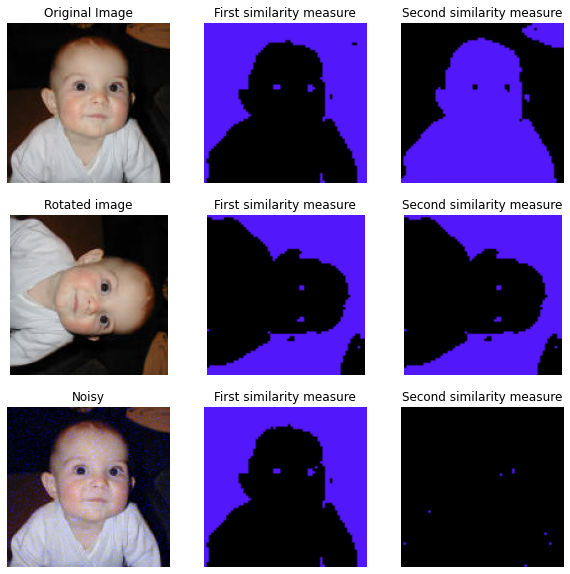

In [ ]:
# Original Image
image2 = cv2.imread("/content/drive/MyDrive/AIP_A2/test2.jpg")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Display the original image
axs[0, 0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display the segmented image using similarity measure-1
segmented1_image2 = image_segmentation1(image1, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 1].imshow(cv2.cvtColor(segmented1_image2, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("First similarity measure")
axs[0, 1].axis('off')

# Display the segmented image using similarity measure-2
segmented2_image2 = image_segmentation2(image2, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 2].imshow(cv2.cvtColor(segmented2_image2, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Second similarity measure")
axs[0, 2].axis('off')

# Rotate the image
rotated_image2 = cv2.rotate(image2, cv2.ROTATE_90_CLOCKWISE)
axs[1, 0].imshow(cv2.cvtColor(rotated_image2, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Rotated image")
axs[1, 0].axis('off')

# Display the Rotated Segmented Image
segmented1_rotated_image2 = image_segmentation1(rotated_image2, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 1].imshow(cv2.cvtColor(segmented1_rotated_image2, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("First similarity measure")
axs[1, 1].axis('off')

# Display the Rotated Segmented Image
segmented2_rotated_image2 = image_segmentation1(rotated_image2, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 2].imshow(cv2.cvtColor(segmented2_rotated_image2, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title("Second similarity measure")
axs[1, 2].axis('off')

# Add Gaussian noise to the image
noise = np.zeros_like(image2)
cv2.randn(noise, 0, 50)
noisy_image2 = cv2.add(image2, noise)
axs[2, 0].imshow(cv2.cvtColor(noisy_image2, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title("Noisy")
axs[2, 0].axis('off')

# Display the Noisy Segmented Image
segmented1_noisy_image2 = image_segmentation1(noisy_image2, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 1].imshow(cv2.cvtColor(segmented1_noisy_image2, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title("First similarity measure")
axs[2, 1].axis('off')

# Display the Noisy Segmented Image
segmented2_noisy_image2 = image_segmentation2(noisy_image2, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 2].imshow(cv2.cvtColor(segmented2_noisy_image2, cv2.COLOR_BGR2RGB))
axs[2, 2].set_title("Second similarity measure")
axs[2, 2].axis('off')

# Display the figure
plt.show()

<ipython-input-2-0ed69ea45fe6>:38: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (pixels[i] - pixels[j])**2


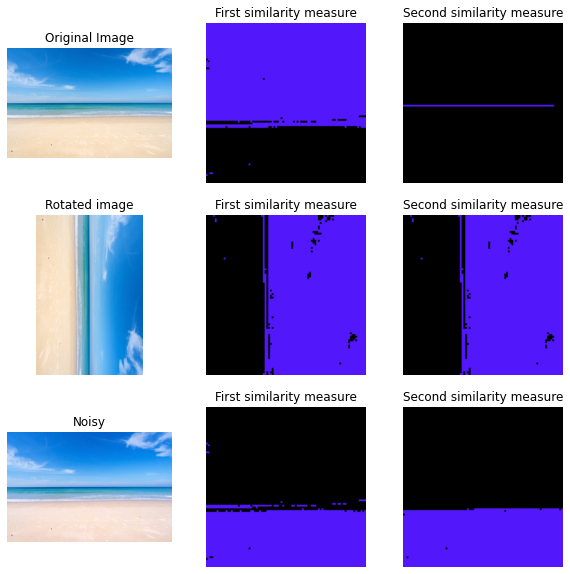

In [ ]:
# Original Image
image3 = cv2.imread("/content/drive/MyDrive/AIP_A2/test3.jpg")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Display the original image
axs[0, 0].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display the segmented image using similarity measure-1
segmented1_image3 = image_segmentation1(image3, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 1].imshow(cv2.cvtColor(segmented1_image3, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("First similarity measure")
axs[0, 1].axis('off')

# Display the segmented image using similarity measure-2
segmented2_image3 = image_segmentation2(image3, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 2].imshow(cv2.cvtColor(segmented2_image3, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Second similarity measure")
axs[0, 2].axis('off')

# Rotate the image
rotated_image3 = cv2.rotate(image3, cv2.ROTATE_90_CLOCKWISE)
axs[1, 0].imshow(cv2.cvtColor(rotated_image3, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Rotated image")
axs[1, 0].axis('off')

# Display the Rotated Segmented Image
segmented1_rotated_image3 = image_segmentation1(rotated_image3, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 1].imshow(cv2.cvtColor(segmented1_rotated_image3, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("First similarity measure")
axs[1, 1].axis('off')

# Display the Rotated Segmented Image
segmented2_rotated_image3 = image_segmentation1(rotated_image3, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 2].imshow(cv2.cvtColor(segmented2_rotated_image3, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title("Second similarity measure")
axs[1, 2].axis('off')

# Add Gaussian noise to the image
noise = np.zeros_like(image3)
cv2.randn(noise, 0, 50)
noisy_image3 = cv2.add(image3, noise)
axs[2, 0].imshow(cv2.cvtColor(noisy_image3, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title("Noisy")
axs[2, 0].axis('off')

# Display the Noisy Segmented Image
segmented1_noisy_image3 = image_segmentation1(noisy_image3, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 1].imshow(cv2.cvtColor(segmented1_noisy_image3, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title("First similarity measure")
axs[2, 1].axis('off')

# Display the Noisy Segmented Image
segmented2_noisy_image3 = image_segmentation2(noisy_image3, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 2].imshow(cv2.cvtColor(segmented2_noisy_image3, cv2.COLOR_BGR2RGB))
axs[2, 2].set_title("Second similarity measure")
axs[2, 2].axis('off')

# Display the figure
plt.show()

<ipython-input-2-441dd5d4e7b8>:38: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (pixels[i] - pixels[j])**2


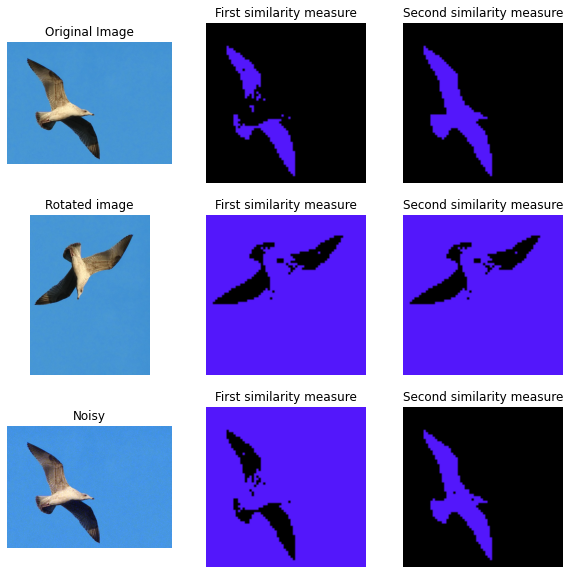

In [4]:
# Original Image
image4 = cv2.imread("/content/drive/MyDrive/AIP_A2/test4.jpg")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Display the original image
axs[0, 0].imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display the segmented image using similarity measure-1
segmented1_image4 = image_segmentation1(image4, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 1].imshow(cv2.cvtColor(segmented1_image4, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("First similarity measure")
axs[0, 1].axis('off')

# Display the segmented image using similarity measure-2
segmented2_image4 = image_segmentation2(image4, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 2].imshow(cv2.cvtColor(segmented2_image4, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Second similarity measure")
axs[0, 2].axis('off')

# Rotate the image
rotated_image4 = cv2.rotate(image4, cv2.ROTATE_90_CLOCKWISE)
axs[1, 0].imshow(cv2.cvtColor(rotated_image4, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Rotated image")
axs[1, 0].axis('off')

# Display the Rotated Segmented Image
segmented1_rotated_image4 = image_segmentation1(rotated_image4, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 1].imshow(cv2.cvtColor(segmented1_rotated_image4, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("First similarity measure")
axs[1, 1].axis('off')

# Display the Rotated Segmented Image
segmented2_rotated_image4 = image_segmentation1(rotated_image4, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 2].imshow(cv2.cvtColor(segmented2_rotated_image4, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title("Second similarity measure")
axs[1, 2].axis('off')

# Add Gaussian noise to the image
noise = np.zeros_like(image4)
cv2.randn(noise, 0, 50)
noisy_image4 = cv2.add(image4, noise)
axs[2, 0].imshow(cv2.cvtColor(noisy_image4, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title("Noisy")
axs[2, 0].axis('off')

# Display the Noisy Segmented Image
segmented1_noisy_image4 = image_segmentation1(noisy_image4, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 1].imshow(cv2.cvtColor(segmented1_noisy_image4, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title("First similarity measure")
axs[2, 1].axis('off')

# Display the Noisy Segmented Image
segmented2_noisy_image4 = image_segmentation2(noisy_image4, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 2].imshow(cv2.cvtColor(segmented2_noisy_image4, cv2.COLOR_BGR2RGB))
axs[2, 2].set_title("Second similarity measure")
axs[2, 2].axis('off')

# Display the figure
plt.show()

<ipython-input-2-441dd5d4e7b8>:38: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (pixels[i] - pixels[j])**2


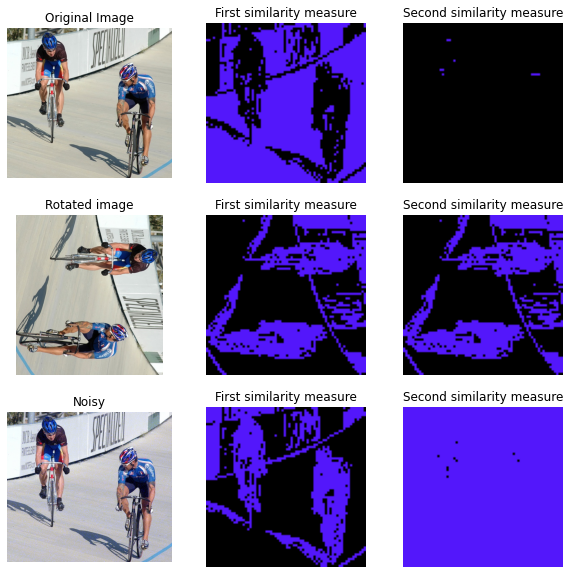

In [5]:
# Original Image
image5 = cv2.imread("/content/drive/MyDrive/AIP_A2/test5.jpg")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Display the original image
axs[0, 0].imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display the segmented image using similarity measure-1
segmented1_image5 = image_segmentation1(image5, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 1].imshow(cv2.cvtColor(segmented1_image5, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("First similarity measure")
axs[0, 1].axis('off')

# Display the segmented image using similarity measure-2
segmented2_image5 = image_segmentation2(image5, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[0, 2].imshow(cv2.cvtColor(segmented2_image5, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Second similarity measure")
axs[0, 2].axis('off')

# Rotate the image
rotated_image5 = cv2.rotate(image5, cv2.ROTATE_90_CLOCKWISE)
axs[1, 0].imshow(cv2.cvtColor(rotated_image5, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Rotated image")
axs[1, 0].axis('off')

# Display the Rotated Segmented Image
segmented1_rotated_image5 = image_segmentation1(rotated_image5, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 1].imshow(cv2.cvtColor(segmented1_rotated_image5, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("First similarity measure")
axs[1, 1].axis('off')

# Display the Rotated Segmented Image
segmented2_rotated_image5 = image_segmentation1(rotated_image5, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[1, 2].imshow(cv2.cvtColor(segmented2_rotated_image5, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title("Second similarity measure")
axs[1, 2].axis('off')

# Add Gaussian noise to the image
noise = np.zeros_like(image5)
cv2.randn(noise, 0, 50)
noisy_image5 = cv2.add(image5, noise)
axs[2, 0].imshow(cv2.cvtColor(noisy_image5, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title("Noisy")
axs[2, 0].axis('off')

# Display the Noisy Segmented Image
segmented1_noisy_image5 = image_segmentation1(noisy_image5, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 1].imshow(cv2.cvtColor(segmented1_noisy_image5, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title("First similarity measure")
axs[2, 1].axis('off')

# Display the Noisy Segmented Image
segmented2_noisy_image5 = image_segmentation2(noisy_image5, 2,np.array([0,0,0]),np.array([251,23,83]))
axs[2, 2].imshow(cv2.cvtColor(segmented2_noisy_image5, cv2.COLOR_BGR2RGB))
axs[2, 2].set_title("Second similarity measure")
axs[2, 2].axis('off')

# Display the figure
plt.show()